In [1]:
# Base
import pandas as pd
import numpy as np
import random as rnd
from math import floor
from Myfunctions import *
# from Myfunctions import repmiss
# from Myfunctions import showmiss
# from Myfunctions import get_best_score
# from scrpt1 import *

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm
%matplotlib inline

# Data Engineering
from sklearn.decomposition import PCA, KernelPCA
from sklearn.pipeline import Pipeline, make_pipeline

# machine learning classification
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# machine learning regression
from sklearn.linear_model import LinearRegression,ElasticNet,Lasso,BayesianRidge,LassoLarsIC
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.base import BaseEstimator,TransformerMixin,RegressorMixin,clone
import xgboost as xgb

#Model Validation
from sklearn import datasets
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV,KFold,cross_val_score,train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectKBest, f_classif,f_regression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler,StandardScaler

import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)


In [2]:
train_df = pd.read_csv(r"C:\Users\kuangj\Desktop\Python\Housing\train.csv")
test_df = pd.read_csv(r"C:\Users\kuangj\Desktop\Python\Housing\test.csv")

In [3]:
print(train_df['SalePrice'].skew())
print("*"*50)
print(train_df['SalePrice'].kurt())

1.8828757597682129
**************************************************
6.536281860064529


C:\Users\kuangj\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


0.12133506220520406
**************************************************
0.8095319958036296


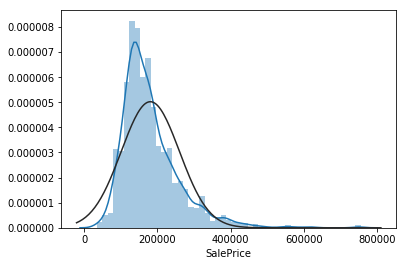

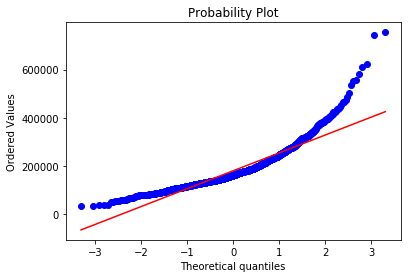

In [4]:
test_df['SalePrice']=1
combine = train_df.append(test_df)
combine.shape

sns.distplot(train_df['SalePrice'],fit=norm);
fig = plt.figure()
res = stats.probplot(train_df['SalePrice'], plot=plt)

train_df['SalePrice'].skew()
train_df['SalePrice'].kurt()

combine['SalePrice'] = np.log(combine['SalePrice'])
train_df['SalePrice'] = np.log(train_df['SalePrice'])
test_df['SalePrice'] = np.log(test_df['SalePrice'])

print(train_df['SalePrice'].skew())
print("*"*50)
print(train_df['SalePrice'].kurt())

C:\Users\kuangj\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


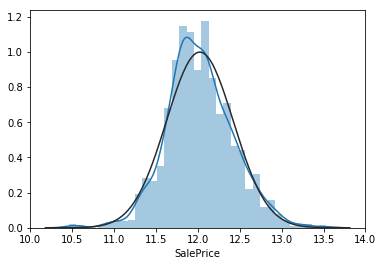

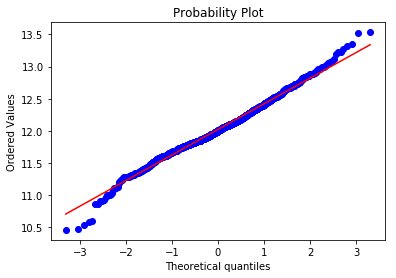

In [5]:
# After log transformation
sns.distplot(train_df['SalePrice'] , fit=norm);
fig = plt.figure();
res = stats.probplot(train_df['SalePrice'], plot=plt);

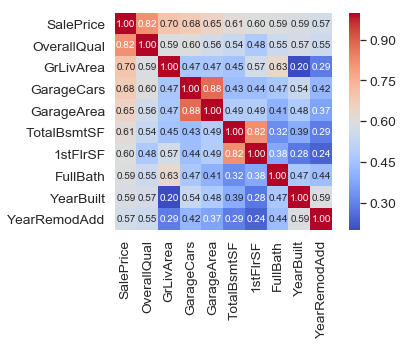

In [6]:
#Saleprice correlation matrix
corrmat = train_df.corr().abs()
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cmd = np.corrcoef(train_df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cmd,cmap="coolwarm",cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10},yticklabels=cols.values, xticklabels=cols.values)
plt.show()


In [7]:
print(train_df.shape)
print(test_df.shape)

(1460, 81)
(1459, 81)


In [8]:
train_df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,12.247694
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,12.109011
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,12.317167


In [9]:
print(train_df.describe())
print("*"*50)
print(combine.info())

                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000

In [10]:
misstable,droplistfull=showmiss(combine)
droplistfull

,Total,Miss,Percent
PoolQC,2919,2909,0.996574
MiscFeature,2919,2814,0.964029
Alley,2919,2721,0.932169
Fence,2919,2348,0.804385
FireplaceQu,2919,1420,0.486468
LotFrontage,2919,486,0.166495
GarageYrBlt,2919,159,0.054471
GarageQual,2919,159,0.054471
GarageFinish,2919,159,0.054471
GarageCond,2919,159,0.054471


In [11]:
# Decide to drop top 6
droplist=droplistfull[:6]
l=droplist.index.tolist()
list(l)
cm=combine.drop(columns=list(l), axis=1)
cm=cm.drop(columns=['Id'])
# cm=cm.replace(r'', np.nan, regex=True)
# cm.to_csv('checkall.csv',index=True)

In [12]:
# Replace missing values with average and most frequent
train_dfmt=cm[0:train_df.shape[0]]
test_dfmt=cm[train_df.shape[0]:]
train_dfmt.to_csv('checktrain_b.csv',index=True)
test_dfmt.to_csv('checktest_b.csv',index=True)

train_dfm,test_dfm=repmiss(train_dfmt,test_dfmt)

train_dfm.to_csv('checktrain_af.csv',index=True)
test_dfm.to_csv('checktest_af.csv',index=True)

cm=train_dfm.append(test_dfm)

In [13]:
# Convert categorical to dummy variable
# cm1 = pd.get_dummies(cm)
# cm['LotShape'] = cm.LotShape.cat.codes

le = LabelEncoder()
for i in cm.columns[cm.dtypes == 'object']: # df.dtypes == 'category'
    cm[i]=le.fit_transform(list(cm[i].values))
cm.head(5)

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,8450,1,3,3,0,4,0,5,...,0,0,0,0,0,2,2008,8,4,12.247694
1,20,3,9600,1,3,3,0,2,0,24,...,0,0,0,0,0,5,2007,8,4,12.109011
2,60,3,11250,1,0,3,0,4,0,5,...,0,0,0,0,0,9,2008,8,4,12.317167
3,70,3,9550,1,0,3,0,0,0,6,...,272,0,0,0,0,2,2006,8,0,11.849398
4,60,3,14260,1,0,3,0,2,0,15,...,0,0,0,0,0,12,2008,8,4,12.429216


In [14]:
train_dfm=cm[0:train_df.shape[0]]
train_dfm.shape
test_dfm=cm[train_df.shape[0]:]
test_dfm.shape

(1459, 74)

In [15]:
# Replace missing values with average
# for i in train_dfm[ind]:
#     train_dfm.loc[:,i]=train_dfm.loc[:,i].fillna(train_dfm[i].mean())
# for j in test_dfm[ind]:
#     test_dfm.loc[:,j]=test_dfm.loc[:,j].fillna(test_dfm[j].mean())
# cm_m=train_dfm.append(test_dfm)
# cm_m.columns[cm_m.isnull().any()].tolist()

In [16]:
# df['column name'].astype(np.int64)
# print(cm_m.columns[cm_m.isnull().any()])
# list_m=cm_m.columns[cm_m.isnull().any().tolist()
#     train_dfm[i]=train_dfm[i].fillna(train_dfm[i].value_counts().idxmax())
#     test_dfm[i]=test_dfm[i].fillna(test_dfm[i].value_counts().idxmax())
# print(train_dfm['GarageType'].value_counts())
# train_dfm['GarageType'] = train_dfm['GarageType'].fillna(train_dfm['GarageType'].value_counts().idxmax())

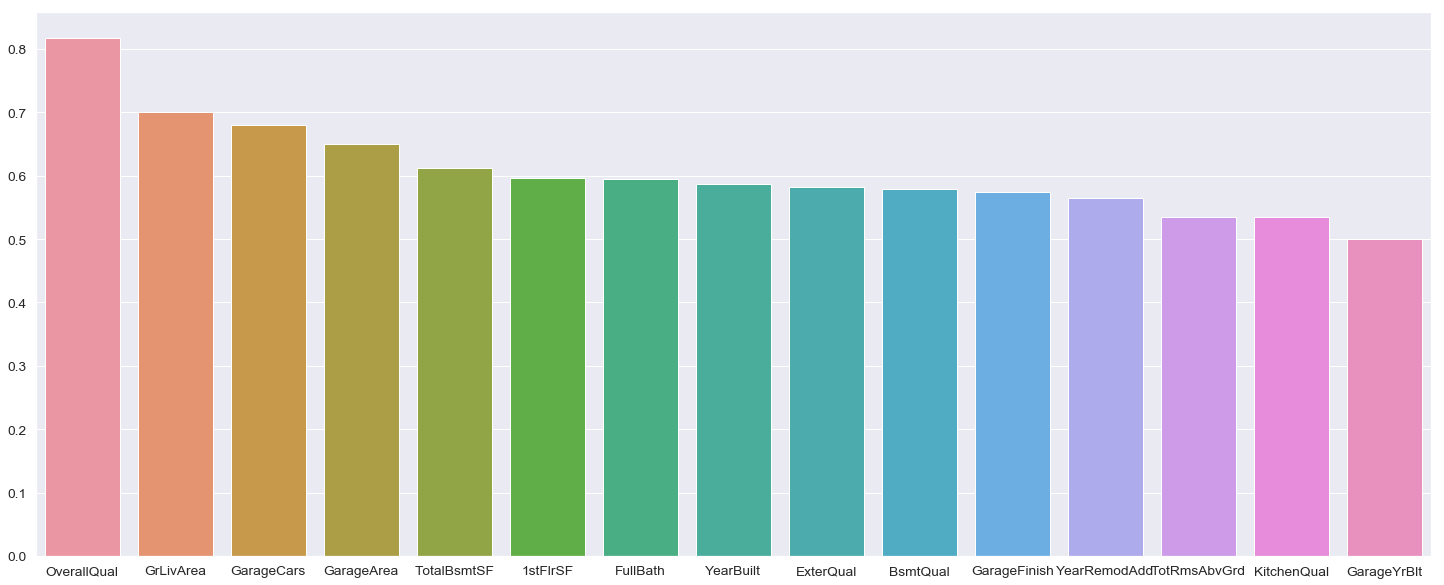

In [17]:
targetcorr=train_dfm.drop(columns=['SalePrice'],axis=1).apply(lambda x: x.corr(train_dfm.SalePrice)).abs().sort_values(ascending=False)
t=targetcorr[abs(targetcorr)>0.5]
f, ax = plt.subplots(figsize=(25, 10))
sns.barplot(x=t.index, y=t)

In [18]:
# Data Prep
ftx=test_dfm.drop(columns=['SalePrice'])
xt=train_dfm.drop(columns=['SalePrice'])
yt=train_dfm['SalePrice']

# Feature Scaling

In [19]:
scaler = StandardScaler()
transformer = scaler.fit(xt)
xts=transformer.transform(xt)
xts = pd.DataFrame(xts, columns=xt.columns)
ftxs=transformer.transform(ftx)
ftxs = pd.DataFrame(ftxs, columns=ftx.columns)

xt=xts.copy(deep=True)
ftx=ftxs.copy(deep=True)

# PCA

In [20]:
pca=PCA(n_components = 'mle',copy=True)
fitpca=pca.fit(xt)
# pcaxt=pca.transform(xt)
# pcaxt=pd.DataFrame(pcaxt,columns=["PC1","PC2"])
# pcaftx=pca.transform(ftx)
# pcaftx=pd.DataFrame(pcaftx,columns=["PC1","PC2"])

pcaratio=pd.DataFrame(pca.explained_variance_ratio_,columns=["ratio"])
pcaratio.to_csv('PCA_Ratio.csv',index=False)

# xt=pcaxt.copy(deep=True)
# ftx=pcaftx.copy(deep=True)

In [21]:
# Split Training Data into Sub_Train and Sub_Validation
xTrain, xTest, yTrain, yTest = train_test_split(xt, yt, test_size = 0.3, random_state = 146)

In [22]:
#Normalize Training and Testing Data
# normalizer = preprocessing.Normalizer().fit(xTrain)
# xtrainnorm = normalizer.transform(xTrain) 
# xtestnorm = normalizer.transform(xTest)

# xTrain=xtrainnorm
# xTest=xtestnorm
# ftx=normalizer.transform(ftx)

# Linear Regression

In [23]:
linearmodel = LinearRegression()
# 2. Use fit
linearmodel.fit(xTrain, yTrain)
# 3. Check the score
linearscore=linearmodel.score(xTest, yTest)

# Linear Regression with Regulization

Text(0,0.5,'rmse')

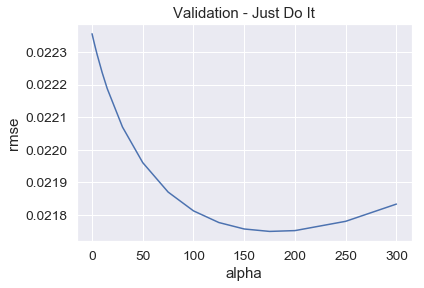

In [24]:
# Cal MSE in Test set
arange = [0.01,0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75,100, 125,150,175,200,250,300]
msecv=[]
for x in arange:
    rr = Ridge(alpha=x)
    rr.fit(xTrain, yTrain)
    yPred = rr.predict(xTest)
    mse = mean_squared_error(yTest,yPred)
    msecv.append(mse)

cv_ridge = pd.Series(msecv, index = arange)
cv_ridge.plot(title = "Validation - Just Do It")
plt.xlabel("alpha")
plt.ylabel("rmse")

# msecv=[]
# for x in arange:
#     rr = Ridge(alpha=x)
#     rr.fit(xTrain, yTrain)
#     yPred = rr.predict(xTest)
#     mse = np.mean((yTest - yPred)**2)
#     msecv=[mseve,mse]
# msecv


In [25]:
nr_cv=5
score_calc = 'neg_mean_squared_error'
# score_calc = 'r2'

ridge = Ridge()
parameters = {'alpha':[0.001,0.005,0.01,0.1,0.5,1,3,10], 'normalize':[True,False], 'tol':[1e-06,5e-06,1e-05,5e-05]}
grid_ridge = GridSearchCV(ridge, parameters, cv=nr_cv, scoring = score_calc,verbose=1)
grid_ridge.fit(xTrain, yTrain)
sc_ridge = get_best_score(grid_ridge)


Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.





**************************************************
Best Score is  0.15584322634809694
Best Paras Are  {'alpha': 0.5, 'normalize': True, 'tol': 1e-06}
Best Ests Are  Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=1e-06)
**************************************************




[Parallel(n_jobs=1)]: Done 320 out of 320 | elapsed:    2.2s finished


In [26]:
# Cal MSE in CV
def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, xTrain, yTrain, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

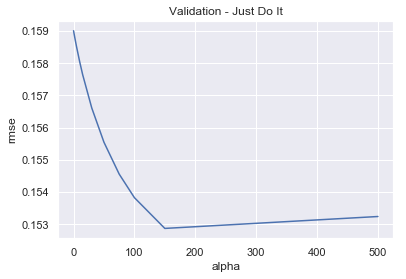

In [43]:
# Cal MSE in Train CV
arange = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75,100, 150,500]
# len(arange)    
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() 
            for alpha in arange]

cv_ridge = pd.Series(cv_ridge, index = arange)
cv_ridge.plot(title = "Validation - Just Do It")
plt.xlabel("alpha")
plt.ylabel("rmse")

rr = Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,normalize=True)
rr.fit(xTrain, yTrain)
linear_r_score=rr.score(xTest, yTest)
# linear_r_score=grid_ridge.score(xTest, yTest)

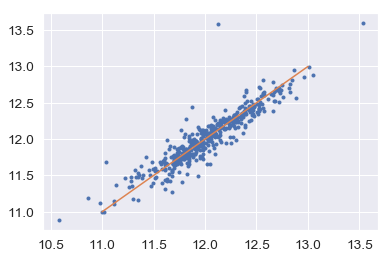

In [28]:
yPred=linearmodel.predict(xTest)
plt.plot(yTest,yPred, '.')

# plot a line, a perfit predict would all fall on this line
x = np.linspace(11, 13, 13)
y = x
plt.plot(x, y)
plt.show()

In [29]:
linear=pd.DataFrame({'Pred':yPred, 'Act':yTest})

In [30]:
linear['DiffPA']=linear.Pred/linear.Act
linear.sort_values(by=['DiffPA'],ascending=False);

# XGBoost

In [31]:
xgbmodel=xgb.XGBRegressor()
xgbmodel.fit(xTrain, yTrain)
xgbscore=xgbmodel.score(xTest,yTest)

# Random Forest Regression

In [32]:
RFRmodel = RandomForestRegressor(n_estimators=40)
RFRmodel.fit(xTrain, yTrain)
RFRscore=RFRmodel.score(xTest,yTest)
RFRimp = pd.DataFrame(columns=['RFRImportance'],data=1000*RFRmodel.feature_importances_,index=xTrain.columns).sort_values(by=['RFRImportance'],ascending=False)

# Model Valication

<module 'matplotlib.pyplot' from 'C:\\Users\\kuangj\\AppData\\Local\\Continuum\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

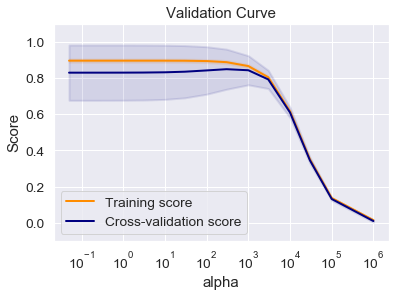

In [33]:
# Regularization parameter
alp=[0.05, 0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000, 3000, 10000, 30000, 100000,1000000]
cv=10
pname="alpha"
model=Ridge()
t = "Validation Curves Linear"
train_scores, valid_scores = validation_curve(model,X=xTrain,y=yTrain,param_name=pname,param_range=alp,cv=cv)
plot_validation_curve(model,X=xTrain,y=yTrain,title=t,param_name=pname,param_range=alp,cv=cv)
# print(train_scores)
# print(valid_scores)

[ 91 183 275 367 459 551 643 735 827 919]
[[0.99 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96]
 [0.97 0.94 0.92 0.92 0.92 0.92 0.92 0.92 0.92 0.92]
 [0.95 0.93 0.89 0.9  0.9  0.9  0.9  0.9  0.9  0.9 ]
 [0.92 0.93 0.9  0.9  0.89 0.89 0.89 0.89 0.89 0.89]
 [0.91 0.93 0.9  0.9  0.89 0.9  0.9  0.9  0.9  0.9 ]
 [0.9  0.92 0.89 0.89 0.89 0.89 0.89 0.89 0.89 0.89]
 [0.9  0.93 0.9  0.89 0.89 0.9  0.89 0.89 0.89 0.89]
 [0.9  0.93 0.9  0.9  0.89 0.9  0.89 0.89 0.89 0.89]
 [0.9  0.93 0.9  0.9  0.9  0.9  0.89 0.9  0.89 0.9 ]
 [0.9  0.92 0.89 0.89 0.89 0.89 0.89 0.89 0.89 0.9 ]]
[[-1.97e+00  9.01e-02  2.92e-01 -1.00e+26  4.65e-01 -4.86e+26  3.32e-01
   5.46e-01  5.78e-01 -3.68e+25]
 [-9.40e-01  2.50e-01  7.43e-01 -9.32e+24  7.46e-01 -5.77e+25  6.17e-01
   7.28e-01  8.34e-01 -3.42e+24]
 [-9.80e-01  2.24e-01  8.41e-01 -2.28e+25  8.35e-01 -4.31e+23  7.84e-01
   8.10e-01  8.73e-01 -8.37e+24]
 [ 5.80e-01  3.62e-01  8.45e-01 -4.30e+23  8.70e-01 -7.44e+23  8.49e-01
   8.36e-01  8.77e-01  7.90e-01]
 [ 5.50

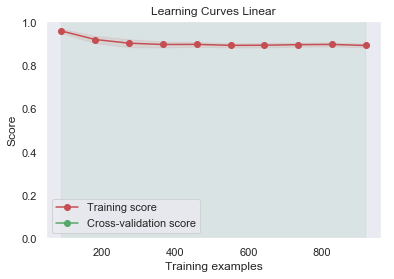

In [44]:
# Learning Curves
c=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
cv=10
model=linearmodel
train_sizes, train_scores, valid_scores = learning_curve(model, xTrain, yTrain, train_sizes=c, cv=cv)
title = "Learning Curves Linear"
plot_learning_curve(model, title,X=xTrain, y=yTrain,train_sizes=c,cv=cv, ylim=(0.0, 1.01))
print(train_sizes)
print(train_scores)
print(valid_scores)

# Final Production

In [35]:
# Final Production
# List all scores
print("Linear Score is ",pp(linearscore,2))
print("Linear R Score is ",pp(linear_r_score,2))
print("Xgb Score is ",pp(xgbscore,2))
print("RFR Score is ",pp(RFRscore,2))

# Linear Regression
fyPredlinear = linearmodel.predict(ftx)
# Linear Regression with Regularization
fyPredlinear_r = grid_ridge.predict(ftx)
# XGBoost
fyPredxgb=xgbmodel.predict(ftx)
# Random Forest Regression
fyPredRFR=RFRmodel.predict(ftx)

# Production output as Ensemble
fyPred=(fyPredxgb+fyPredRFR+fyPredlinear+fyPredlinear_r)/4

Linear Score is  84.98%
Linear R Score is  84.94%
Xgb Score is  88.68%
RFR Score is  85.46%


## Save in Data File

In [36]:
temp=pd.DataFrame(np.exp(fyPred),columns=['SalePrice'])
submit=pd.concat([test_df['Id'], temp['SalePrice']], axis=1)
submit.head(3)
submit.to_csv('submit_temp.csv',index=False)
submit.describe()

,Id,SalePrice
count,1459.000000,1459.000000
mean,2190.000000,176931.000333
std,421.321334,72992.701604
min,1461.000000,52664.252036
25%,1825.500000,127810.716052
50%,2190.000000,156403.593457
75%,2554.500000,206099.144877
max,2919.000000,600587.616533


# Feature Selection

In [37]:
test = SelectKBest(score_func=f_regression, k=30)
fit = test.fit(xTrain, yTrain)

In [38]:
np.set_printoptions(precision=2)
t1=pd.DataFrame(xTest.columns.tolist(),columns=['Feature'])
t2=pd.DataFrame(fit.scores_,columns=['F'])
t3=pd.DataFrame(fit.pvalues_,columns=['P'])
t4=pd.DataFrame(fit.get_support(),columns=['Support'])
fs=pd.concat([t1,t2, t3, t4],axis=1).sort_values(by=['F'],ascending=False)
# fs
# Subset of train
ltm=fs.loc[fs['Support'] == True]
lt=ltm['Feature'].tolist()[:15]
lt.insert(0,'SalePrice')
train_dfmx=train_dfm[lt]
fs.index=fs['Feature']
showt=pd.concat([RFRimp,fs],axis=1)
showt.drop(columns=['Feature']).sort_values(by=['F'],ascending=False)

,RFRImportance,F,P,Support
OverallQual,506.469240,1992.920415,3.885492e-242,True
GrLivArea,123.361081,975.113321,9.019327e-151,True
GarageCars,40.434515,920.883307,1.162365e-144,True
GarageArea,36.705745,766.706126,2.628302e-126,True
ExterQual,0.914032,592.749565,1.383900e-103,True
TotalBsmtSF,48.335269,576.852477,2.182362e-101,True
1stFlrSF,27.486336,553.464550,4.098964e-98,True
FullBath,1.484215,546.940966,3.424085e-97,True
YearBuilt,13.473191,542.778419,1.332867e-96,True
BsmtQual,9.871978,524.904512,4.757434e-94,True


In [39]:
# Get idxs of columns to keep
# newcols = fit.get_support(indices=True)
# Create new dataframe with only desired columns, or overwrite existing
# train_df.loc[:,'MSSubClass':'SaleCondition']

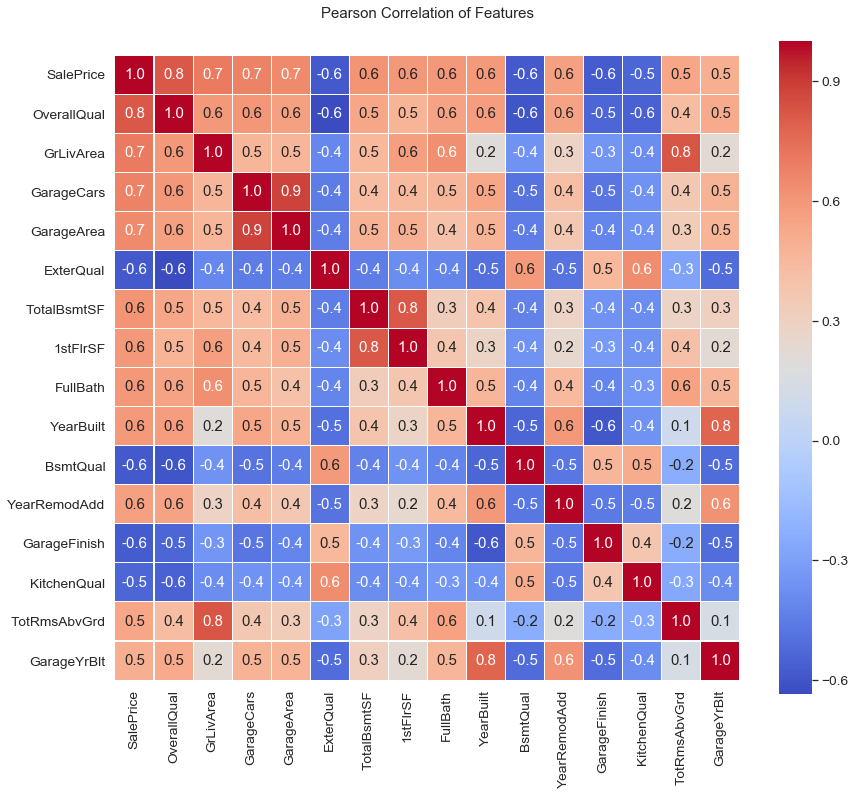

In [40]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train_dfmx.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap="coolwarm",linecolor='white', annot=True,fmt=".1f")

# sns.heatmap(train.astype(float).corr(),linewidths=0.1,vmax=1.0, 
#             square=True, cmap='coolwarm', linecolor='white', annot=True,annot_kws={'size':18})

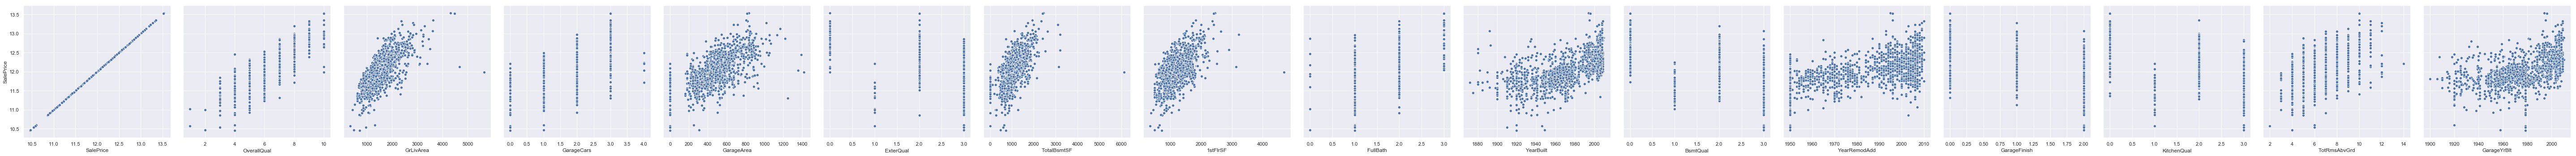

In [41]:
sns.set()
pairpic=sns.pairplot(data=train_dfmx, y_vars=['SalePrice'],x_vars=lt,size = 5)
plt.show();
pairpic.savefig("output.png")